# lab 4 Amelin Viacheslav IP-05
Develop an intelligent agent-machine that moves along the graph-path from the previous laboratory work according to the given rules and goal. Gain practical skills in working with intelligent agents.

In [508]:
import networkx as nx
import matplotlib.pyplot as plt
import random

import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Flatten, Dense

In [509]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

train_X = train_X / 255
test_X = test_X / 255

train_Y_cat = keras.utils.to_categorical(train_Y, 10)
test_Y_cat = keras.utils.to_categorical(test_Y, 10)

In [510]:
model = keras.Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [511]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [512]:
model.fit(train_X, train_Y_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.9178 - val_loss: 0.1592 - val_accuracy: 0.9546
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1308 - accuracy: 0.9619 - val_loss: 0.1180 - val_accuracy: 0.9657
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0897 - accuracy: 0.9730 - val_loss: 0.1072 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0946 - val_accuracy: 0.9724
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.0987 - val_accuracy: 0.9687


In [513]:
model.evaluate(test_X, test_Y_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0864 - accuracy: 0.9747


[0.08638786524534225, 0.9746999740600586]

#### Size road

In [514]:
size = 5
delete = 9
count = 0

left_model_num = 0
rigth_model_num = 10000

#### Check Error

In [515]:
if(size < 2):
    raise ValueError("size must be greater than 1")
maxDelete = (2**(size-1)) + 2
if(maxDelete < delete):
    raise ValueError(f"removal should be no more than, {maxDelete}")

## Algorithm
  

#### Creating and modifying a graph

In [516]:
def randomImg(left_num, rigth_num):
  n = random.randint(left_num, rigth_num)
  while True:
    if(modelFindNum(test_X[n]) > 1):
      return test_X[n], test_Y[n]
    else:
      return randomImg(left_num, rigth_num)

def modelFindNum(img):
  x = np.expand_dims(img, axis=0)
  res = model.predict(x)
  return np.argmax(res)

In [517]:
def road(G):
    nodeList = list(G)
    roadSpeed = {}
    for node in nodeList:
      img, speed = randomImg(left_model_num, rigth_model_num)
      roadSpeed[node] = {'img':img, 'speed': speed}
    return roadSpeed
        
G = nx.grid_2d_graph(size, size)
roadMap = road(G)
nodeList = list(roadMap)

1/1 [==============================] - 0s 18ms/step


In [518]:
while count < delete:
    randomEdgeCol = random.randint(-1, 1)
    randomEdgeRow = random.randint(-1, 1)
    
    randomNode = random.choice(nodeList)
    nodeCol, nodeRow = randomNode[0] + randomEdgeCol, randomNode[1] + randomEdgeRow
    
    if(G.has_edge(randomNode, (nodeCol, nodeRow))): 
        G.remove_edge(randomNode, (nodeCol, nodeRow))
        if not nx.is_connected(G):
            G.add_edge(randomNode, (nodeCol, nodeRow))
        else: count += 1

#### Load graph

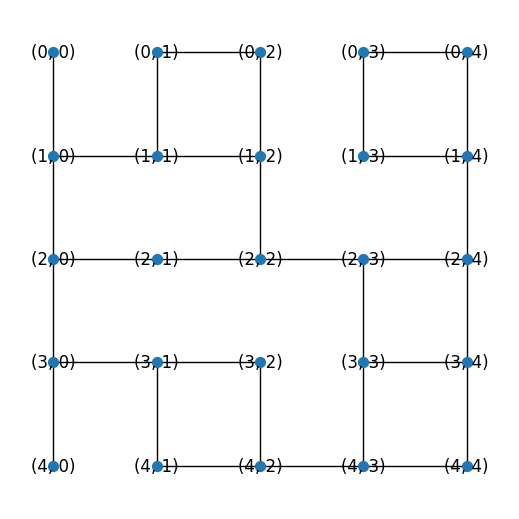

In [519]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos, with_labels=(pos, pos), node_size=50)

#### Enter start and end coordinates

In [520]:
start_cord = (0, 0)
end_cord = (4, 4)

#### Check Error

In [521]:
if((size, size) <= end_cord and (size, size) <= start_cord):
  raise ValueError(f"Should be less {size}")

if(end_cord > (0, 0) and start_cord > (0, 0)):
  raise ValueError("Must be greater than zero")

### Agent

In [522]:
def speedNode(coord):
  number = -1
  for node in nodeList:
    number += 1
    if coord == node:
      return modelFindNum(roadMap[node]['img'])

def agent(G, start_cord, end_cord):
  visited = (start_cord, )
  path = [start_cord]
  speed = [speedNode(start_cord)]

  while path[-1] != end_cord:
    next_nodes = G.adj[path[-1]]
    best = None

    for node in list(next_nodes): 
      if node == end_cord:
        path.append(node)
        speed.append(speedNode(end_cord))
        return path, visited, speed
      elif node not in visited:
        if best is None or abs(node[0] - end_cord[0]) + abs(node[1] - end_cord[1]):
          best = node

    if best is None:
      path.pop()
      speed.pop()
    else:
      path.append(best)
      speed.append(speedNode(best))
      visited += (best,)


path, visited, speed = agent(G, start_cord, end_cord)

1/1 [==============================] - 0s 18ms/step


In [523]:
print('Path:')
print(*path, sep=' => ')

print('Real speed:')
print(*[roadMap[node]['speed'] for node in path], sep=' => ')

print('Car speed:')
print(*speed, sep=' => ')

Path:
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (2, 2) => (2, 3) => (2, 4) => (3, 4) => (4, 4)
Real speed:
7 => 5 => 5 => 2 => 7 => 8 => 2 => 3 => 9
Car speed:
7 => 5 => 5 => 2 => 7 => 8 => 2 => 3 => 9


#### Load graph

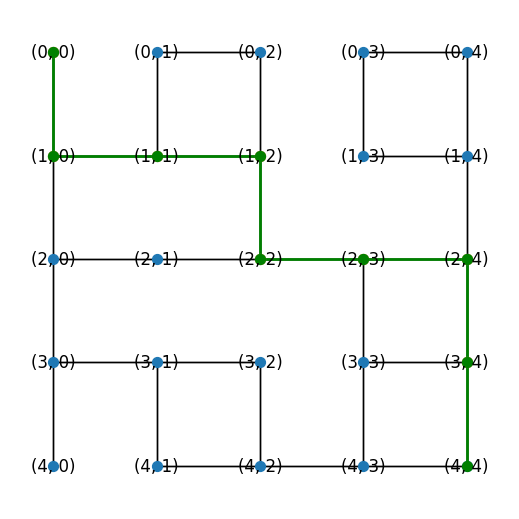

In [524]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in nodeList}
nx.draw(G, pos, with_labels=(pos, pos), node_size=50)
nx.draw(G, pos, nodelist=visited, node_color='orange', node_size=50,)
nx.draw(G, pos, nodelist=path, node_color='g', node_size=50,  edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], edge_color='g', width=2)

plt.show()